In [22]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict,Literal
from IPython.display import Image

In [31]:
# d = b^2 - 4*a*c
# x = (-b +- (d)^1/2)/2a

class State(TypedDict):
    a : int
    b : int
    c : int
    equation : str
    d : int
    res : str

In [33]:
def show_equation(state : State):
    equation = f"{state['a']}x^2 {'+' if (state['b'] > 0) else ''} {state['b']}x {'+' if (state['c'] > 0) else ''} {state['c']}"
    return {"equation" : equation}


def calculate_discriminant(state : State):
    descriminant = (state['b']**2) - (4 * state['a'] * state['c'])
    return {"d" : descriminant}


def real_roots(state : State):
    root1 = (-state['b'] + (state['d'] ** 0.5)) / (2 * state['a'])
    root2 = (-state['b'] - (state['d'] ** 0.5)) / (2 * state['a'])
    return {"res" : f"roots are x = {root1} and x = {root2}"}


def no_real_roots(state : State):
    return {"res" : "No real roots available"}

In [34]:
def check_condition(state : State) -> Literal["real_roots", "no_real_roots"]:
    if(state['d'] >= 0):
        return "real_roots"
    else:
        return "no_real_roots"

In [35]:
graph = StateGraph(State)

graph.add_node("show_equation", show_equation)
graph.add_node("calculate_discriminant", calculate_discriminant)
graph.add_node("real_roots", real_roots)
graph.add_node("no_real_roots", no_real_roots)


graph.add_edge(START, "show_equation")
graph.add_edge("show_equation", "calculate_discriminant")

graph.add_conditional_edges("calculate_discriminant", check_condition)

graph.add_edge("real_roots", END)
graph.add_edge("no_real_roots", END)

workflow = graph.compile()

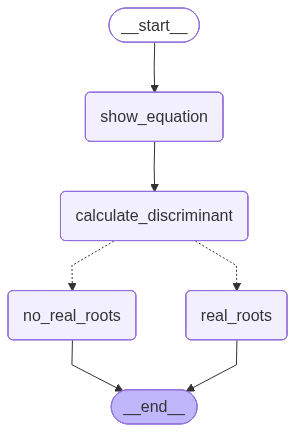

In [36]:
Image(workflow.get_graph().draw_mermaid_png())

In [42]:
initial_state = {"a":2, "b":5 , "c" : 3}

workflow.invoke(initial_state)

{'a': 2,
 'b': 5,
 'c': 3,
 'equation': '2x^2 + 5x + 3',
 'd': 1,
 'res': 'roots are x = -1.0 and x = -1.5'}